In [1]:
# Import libraries
from prophet import Prophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read csv file
df = pd.read_csv("dataset.csv", parse_dates=['timestamp'])

In [3]:
# Rename columns to match Prophet requirements
df = df.rename(columns={"value": "y", "timestamp": "ds"})

In [4]:
# Configure the parmeters
resolution = 5 #in minutes
no_of_days  = 10
no_of_samples_per_day = int(24*60/resolution)
no_of_samples = no_of_samples_per_day * no_of_days

# Amplitute parameters
throughput_per_replica = 50

<AxesSubplot:xlabel='ds'>

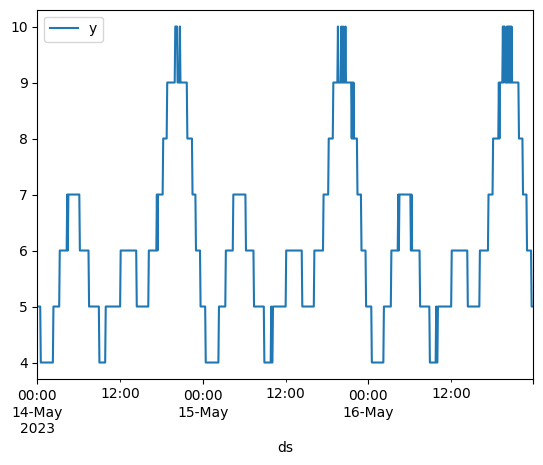

In [5]:
# Scale the value to get replicas
df["y"] = (df["y"] / throughput_per_replica).apply(np.round)

df.head(no_of_samples_per_day*3).plot(kind='line', x='ds', y='y')

In [6]:
# Split data into training & testing data
df_train = df.head(no_of_samples_per_day*6)
df_test = df.tail(no_of_samples_per_day*4)

In [7]:
# Create and fit a prophet model
model = Prophet()
model.fit(df_train)

01:21:00 - cmdstanpy - INFO - Chain [1] start processing
01:21:01 - cmdstanpy - INFO - Chain [1] done processing


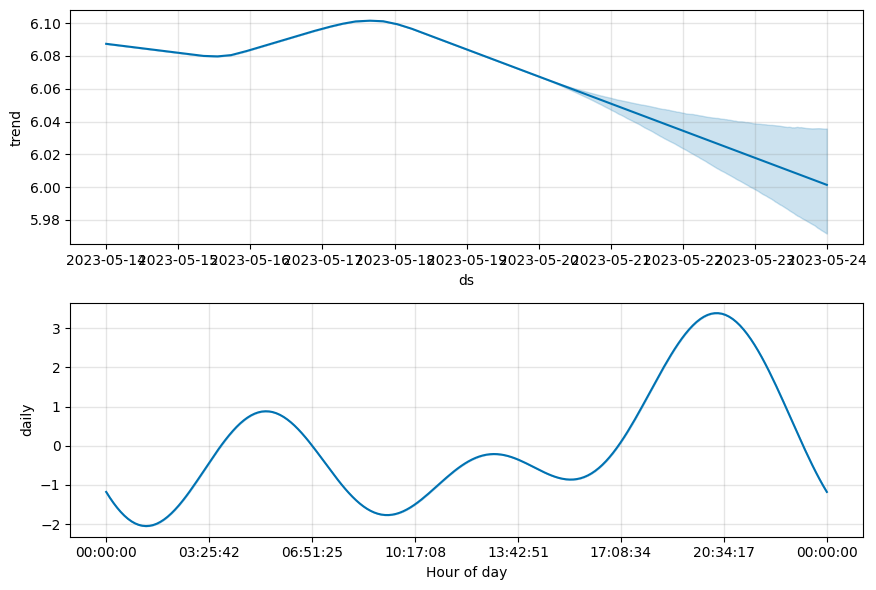

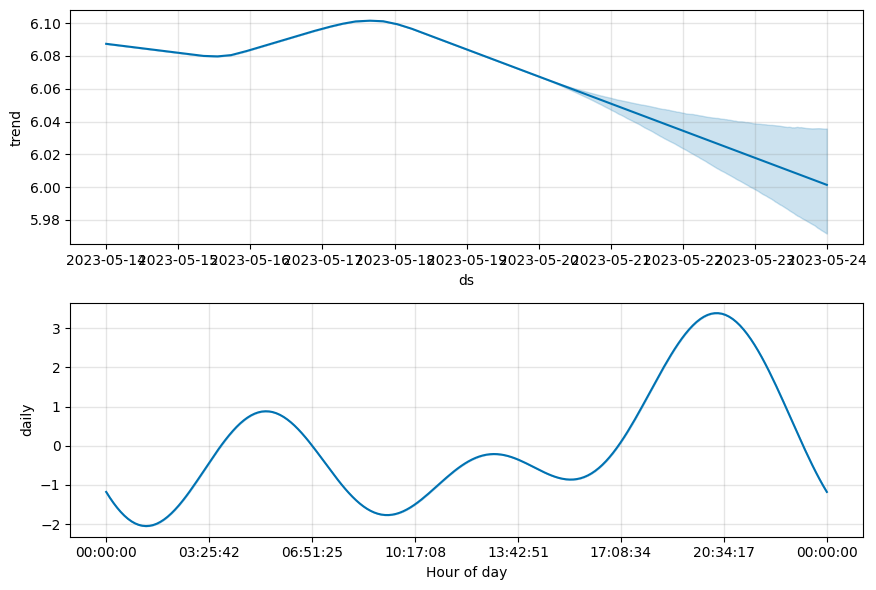

In [8]:
# Predict future values for 4 days
future = model.make_future_dataframe(periods=no_of_samples_per_day*4, freq='{}min'.format(resolution))

forecast = model.predict(future)
forecast['forecasted_y'] = forecast['yhat'].apply(np.ceil)

# Plot the components of the forecast
model.plot_components(forecast)

<AxesSubplot:xlabel='ds'>

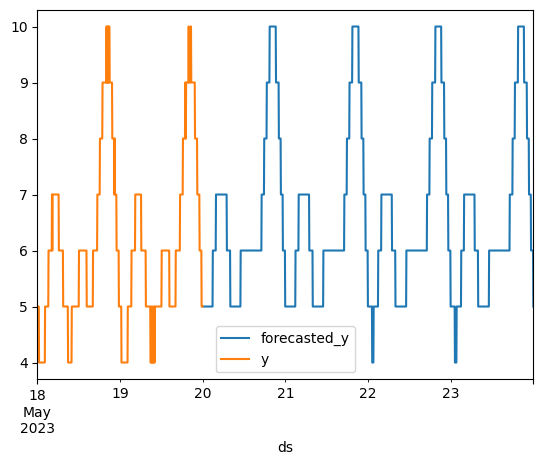

In [9]:
# Plot the actual and forecasted data
ax = forecast.tail(no_of_samples_per_day*4).plot(kind='line', x='ds', y='forecasted_y')
df_train.tail(no_of_samples_per_day*2).plot(x='ds', y='y', ax=ax)

In [10]:
# Calculate the root mean squared error
from sklearn.metrics import mean_squared_error

# Get the actual values from the original dataframe
actual = df_test['y']

# Get the predicted values from the forecasted dataframe
predicted = forecast['forecasted_y'].tail(no_of_samples_per_day*4)

# Calculate the rmse
rmse = np.sqrt(mean_squared_error(actual, predicted))

# Print the rmse
print(f"RMSE: {rmse:.2f}; {rmse * 100 / df_test['y'].max():.2f}%")

RMSE: 0.67; 6.68%
